In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

import seaborn as sns
sns.set_theme(style="whitegrid")
# sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [78]:
miocrobiome_cenlograc_header = pd.read_csv('miocrobiome_cenlograc_header.txt',names=["Name"]);
nutrient_intake_header = pd.read_csv('nutrient intake_header.txt', sep="\n", names=["Name"]);

nutrient_feature_list = [];
miocrobiome_feature_list = [];
nutrient_feature_knockoff_list = [];
miocrobiome_feature_knockoff_list = [];

nutrient_dictionary = {};
nutrient_dictionary_rev = {};

feature_list_orig = []
for index,ele in enumerate(nutrient_intake_header['Name']):
    new_name = "F"+str(index+1);
    nutrient_feature_list.append(new_name);
    nutrient_dictionary[new_name] = ele;
    nutrient_dictionary_rev[ele] = new_name;
    feature_list_orig.append(ele);
    #print(ele)
    
    nutrient_feature_knockoff_list.append(ele+"_knockoff");
for ele in miocrobiome_cenlograc_header['Name']:
    miocrobiome_feature_list.append(ele);
    miocrobiome_feature_knockoff_list.append(ele+"_knockoff");
    feature_list_orig.append(ele);
feature_list = nutrient_feature_list+miocrobiome_feature_list+nutrient_feature_knockoff_list+miocrobiome_feature_knockoff_list;
print(len(feature_list))

602


In [79]:
X_knockoff_data = pd.read_csv('XZ/XZ_knockoff.csv',names=feature_list);
feature_list = nutrient_feature_list+miocrobiome_feature_list;
X_knockoff_data = X_knockoff_data[feature_list];
X_knockoff_data.columns = feature_list_orig;
print(X_knockoff_data.shape)

original_data_Y = pd.read_csv('XZ/Y.csv',names=["BMI"]);
print(original_data_Y.shape);
dataset = pd.concat([X_knockoff_data, original_data_Y], axis=1, join='inner');
print(dataset.shape);

(90, 301)
(90, 1)
(90, 302)


In [80]:
test_list = ['ptdcho(Choline, Phosphatidylcholine)','ptdcho_wo(Choline, Phosphatidylcholine w/o suppl.)'];
dataset[test_list]

,"ptdcho(Choline, Phosphatidylcholine)","ptdcho_wo(Choline, Phosphatidylcholine w/o suppl.)"
0,-0.845819,-0.844025
1,-0.797223,-0.795132
2,-0.395045,-0.392787
3,-1.268353,-1.265914
4,-0.264122,-0.310578
...,...,...
85,-0.280705,-0.279268
86,-1.119114,-1.117261
87,1.071143,1.072079
88,-0.410493,-0.408526


In [81]:
#dataset.columns.tolist()
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(dataset["BMI"].min(), dataset['BMI'].max(), 10);
dataset["BMI_disc"] = np.digitize(dataset["BMI"], bins);
dataset = dataset.loc[dataset['BMI_disc'] <= 5];

In [82]:
prior_list = ['f182(Linoleic)','dprot(Dairy Protein)','ptdcho(Choline, Phosphatidylcholine)'
             ,'ptdcho_wo(Choline, Phosphatidylcholine w/o suppl.)','pfn602(Omega 6)','phenyla(Phenylalanine, Aspartame)'
             ,'aspa(Aspartic Acid, Aspartame)','utf3g(Theaflavin 3-gallate, flavan-3-ol(2))'
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Megamonas'
             ,'Bacteria.Firmicutes.Erysipelotrichi.Erysipelotrichales.Erysipelotrichaceae.Holdemania'
             ,'Bacteria.Proteobacteria.Betaproteobacteria.Burkholderiales.Alcaligenaceae.Sutterella'
             ,"Bacteria.Firmicutes.Clostridia.Clostridiales.Clostridiaceae.Clostridium"
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Acidaminococcus'
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Allisonella'
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Megasphaera'
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Mitsuokella'];
prior_dictionary = {'f182(Linoleic)':0.00036,'dprot(Dairy Protein)':0.00241,'ptdcho(Choline, Phosphatidylcholine)':0.00214
             ,'ptdcho_wo(Choline, Phosphatidylcholine w/o suppl.)':0.00108,'pfn602(Omega 6)':0.0005,'phenyla(Phenylalanine, Aspartame)':0.00614
             ,'aspa(Aspartic Acid, Aspartame)':0.00109,'utf3g(Theaflavin 3-gallate, flavan-3-ol(2))':0.00212
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Megamonas':0.00649
             ,'Bacteria.Firmicutes.Erysipelotrichi.Erysipelotrichales.Erysipelotrichaceae.Holdemania':0.00037
             ,'Bacteria.Proteobacteria.Betaproteobacteria.Burkholderiales.Alcaligenaceae.Sutterella':0.00016
             ,"Bacteria.Firmicutes.Clostridia.Clostridiales.Clostridiaceae.Clostridium":0.00004
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Acidaminococcus':0.00033
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Allisonella':0.00047
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Megasphaera':0.00001
             ,'Bacteria.Firmicutes.Clostridia.Clostridiales.Veillonellaceae.Mitsuokella':0.00406};
prior_Short_names = ['Linoleic','Dairy Protein','Choline, Phosphatidylcholine'
             ,'Choline, Phosphatidylcholine w/o suppl.','Omega 6','Phenylalanine, Aspartame'
             ,'Aspartic Acid, Aspartame','Theaflavin 3-gallate, flavan-3-ol(2)'
             ,'Firmicutes-Megamonas'
             ,'Firmicutes-Holdemania'
             ,'Proteobacteria-Sutterella'
             ,"Firmicutes-Clostridium"
             ,'Firmicutes-Acidaminococcus'
             ,'Firmicutes-Allisonella'
             ,'Firmicutes-Megasphaera'
             ,'Firmicutes-Mitsuokella'];
print(len(prior_list))

16


------
f182(Linoleic)
ks=0.905, pval=1.1556363021748217e-36
rval=0.171862648889551, pval=0.11800533243207116
importance=0.00036
------
dprot(Dairy Protein)
ks=0.81, pval=8.006899918552509e-28
rval=-0.12908088831097964, pval=0.24191145851626283
importance=0.00241
------
ptdcho(Choline, Phosphatidylcholine)
ks=0.881, pval=3.266598614147496e-34
rval=0.06014178084385647, pval=0.586825786676228
importance=0.00214
------
ptdcho_wo(Choline, Phosphatidylcholine w/o suppl.)
ks=0.881, pval=3.266598614147496e-34
rval=0.060616099835058425, pval=0.5838735806212176
importance=0.00108
------
pfn602(Omega 6)
ks=0.869, pval=4.6920234639573125e-33
rval=0.11785242625933351, pval=0.2856663651481744
importance=0.0005
------
phenyla(Phenylalanine, Aspartame)
ks=0.893, pval=2.054464537199683e-35
rval=-0.15163284353643325, pval=0.16854612385172668
importance=0.00614
------
aspa(Aspartic Acid, Aspartame)
ks=0.893, pval=2.054464537199683e-35
rval=-0.15163284353643325, pval=0.16854612385172668
importance=0.00109

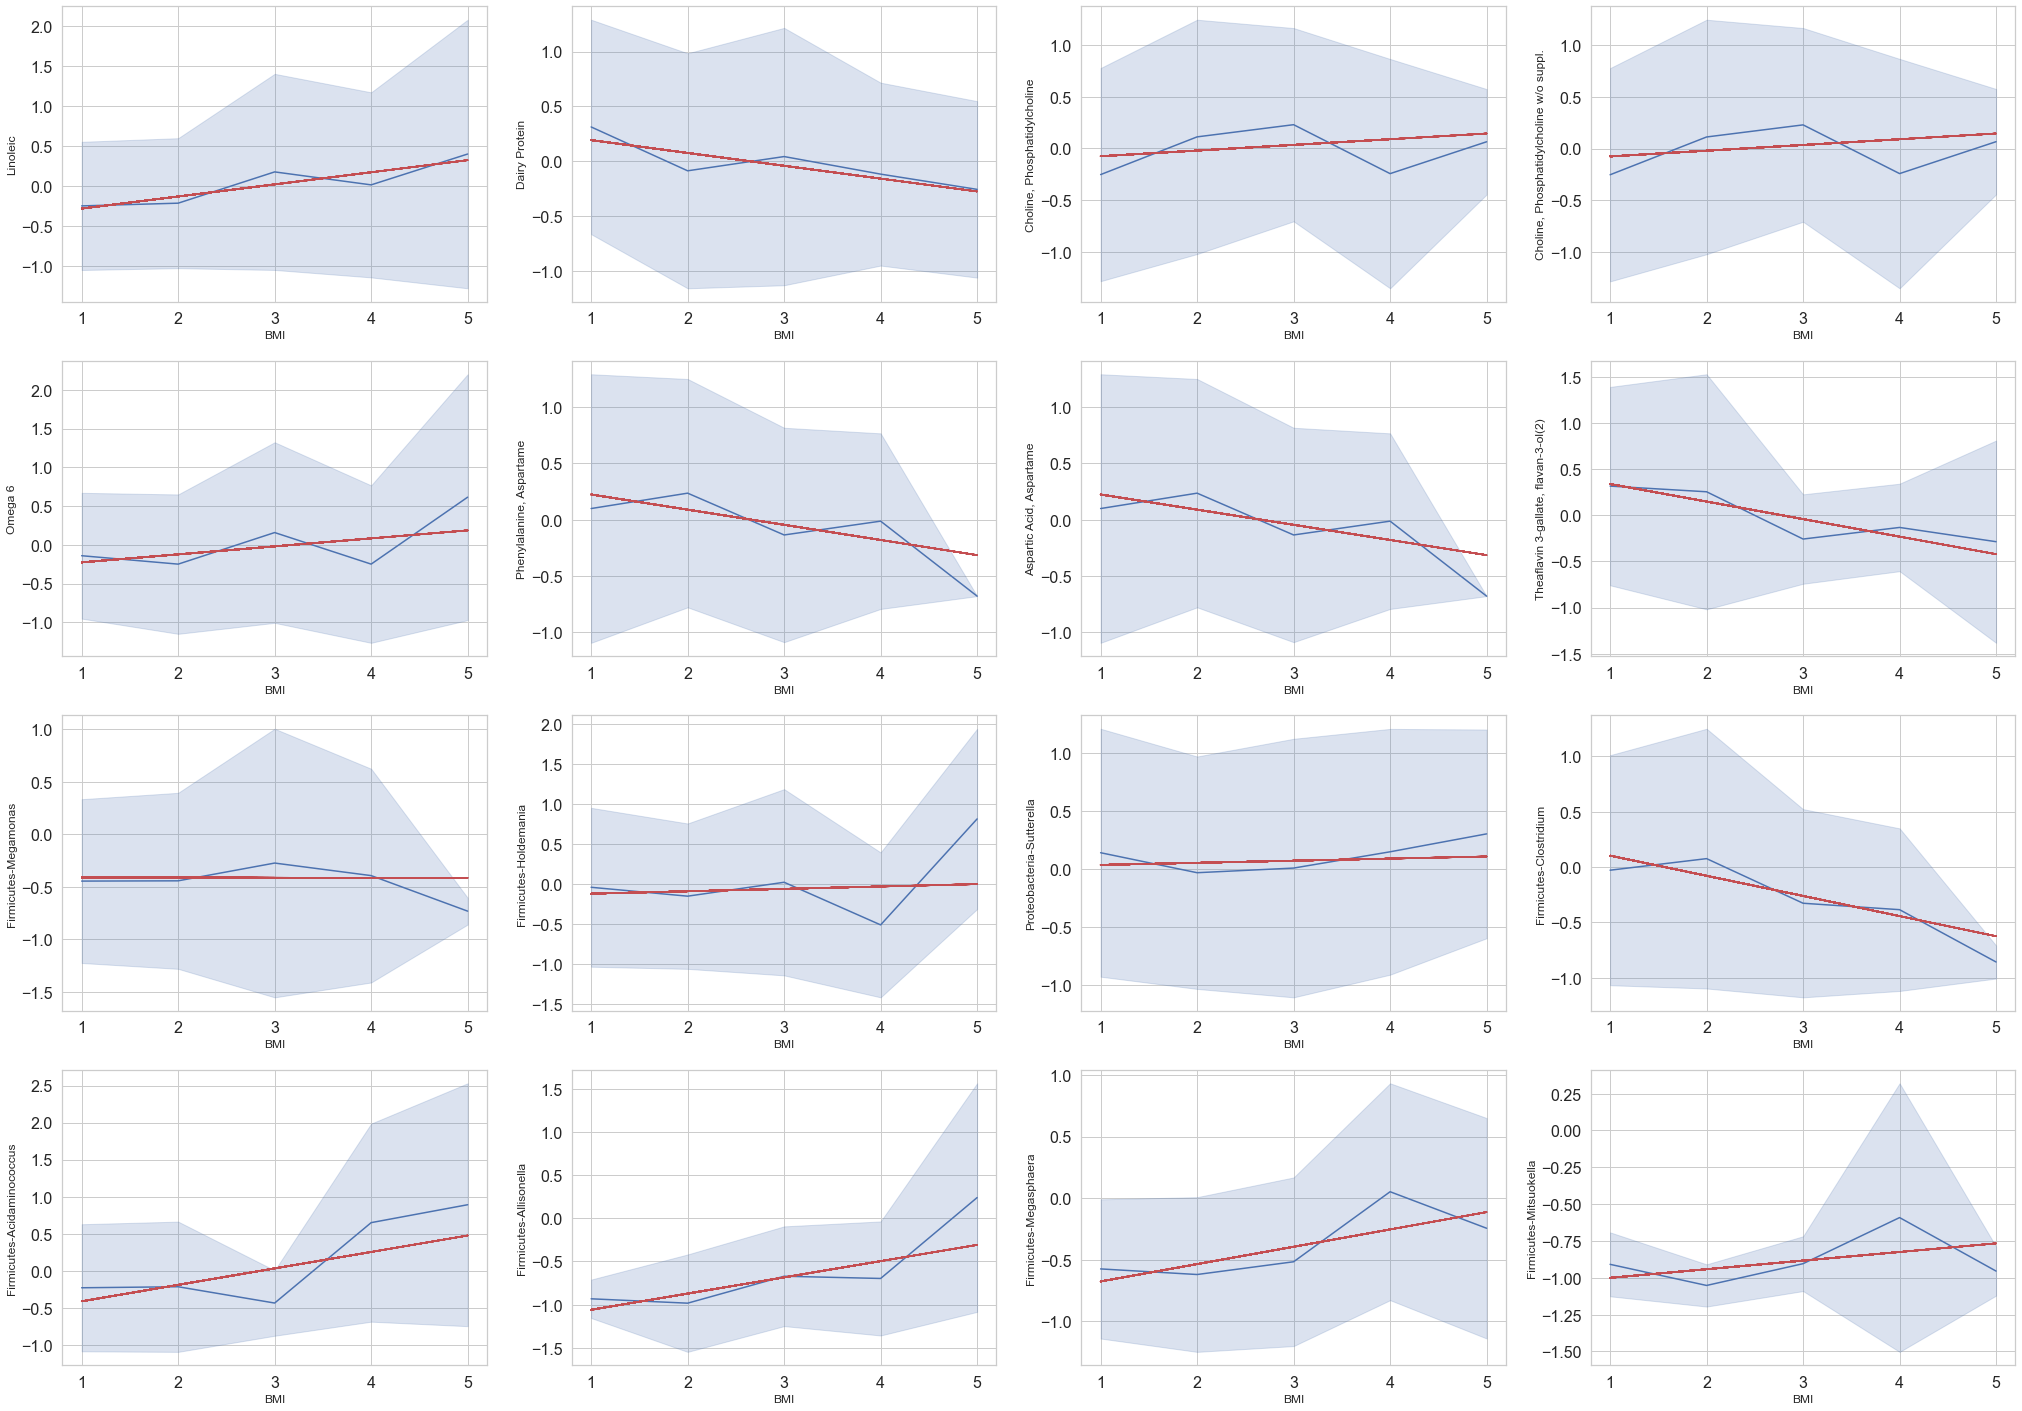

In [84]:
from scipy.stats import ks_2samp
association_list = [];
association_pvals = {};

fig, axs = plt.subplots(4,4,figsize=(35,25));
ax_idx = 0;
axs = axs.flatten();

for ele in prior_list:
    BMI = "BMI_disc";
    ax = sns.lineplot(x=BMI, y=ele, ci="sd", data=dataset,ax=axs[ax_idx]);#relplot , kind="line" lineplot 
    
    test_result = ks_2samp(dataset[BMI].values, dataset[ele].values);
    ks = round(test_result[0],3);
    pval = test_result[1];#round(,3);
    
    x = dataset[BMI].values;
    lin_res = stats.linregress(x, dataset[ele].values);
    ax.plot(x, lin_res.intercept + lin_res.slope*x, 'r', label='fitted line');
    
    title_str = 'ks='+str(ks)+", pval="+str(pval)+\
            "\nrval="+str(lin_res.rvalue)+", pval="+str(lin_res.pvalue)+\
            "\nimportance="+str(prior_dictionary[ele]);
    print("------");
    print(ele)
    print(title_str);
    #ax.set(title=title_str);
    ax.set_ylabel(prior_Short_names[ax_idx]);
    ax.set_xlabel("BMI");
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    
    ax_idx = ax_idx+1;
plt.savefig("BMI_prior_nonlinear_associations_analysis.svg")    

ks=0.889, pval=1.6763185387070804e-37, importance=0.00036
ks=0.822, pval=6.418793411961455e-31, importance=0.00241
ks=0.889, pval=1.6763185387070804e-37, importance=0.00214
ks=0.889, pval=1.6763185387070804e-37, importance=0.00108
ks=0.856, pval=4.715026871599733e-34, importance=0.0005
ks=0.889, pval=1.6763185387070804e-37, importance=0.00614
ks=0.889, pval=1.6763185387070804e-37, importance=0.00109
ks=0.9, pval=9.803032390099885e-39, importance=0.00212
ks=0.922, pval=2.3720202046215613e-41, importance=0.00649
ks=0.833, pval=6.224284520689896e-32, importance=0.00037
ks=0.778, pval=3.848759005772666e-27, importance=0.00016
ks=0.867, pval=3.6485326982616984e-35, importance=4e-05
ks=0.789, pval=4.781067087916355e-28, importance=0.00033
ks=0.956, pval=9.294750018109566e-46, importance=0.00047
ks=0.9, pval=9.803032390099885e-39, importance=1e-05
ks=0.978, pval=3.5401828292171265e-49, importance=0.00406


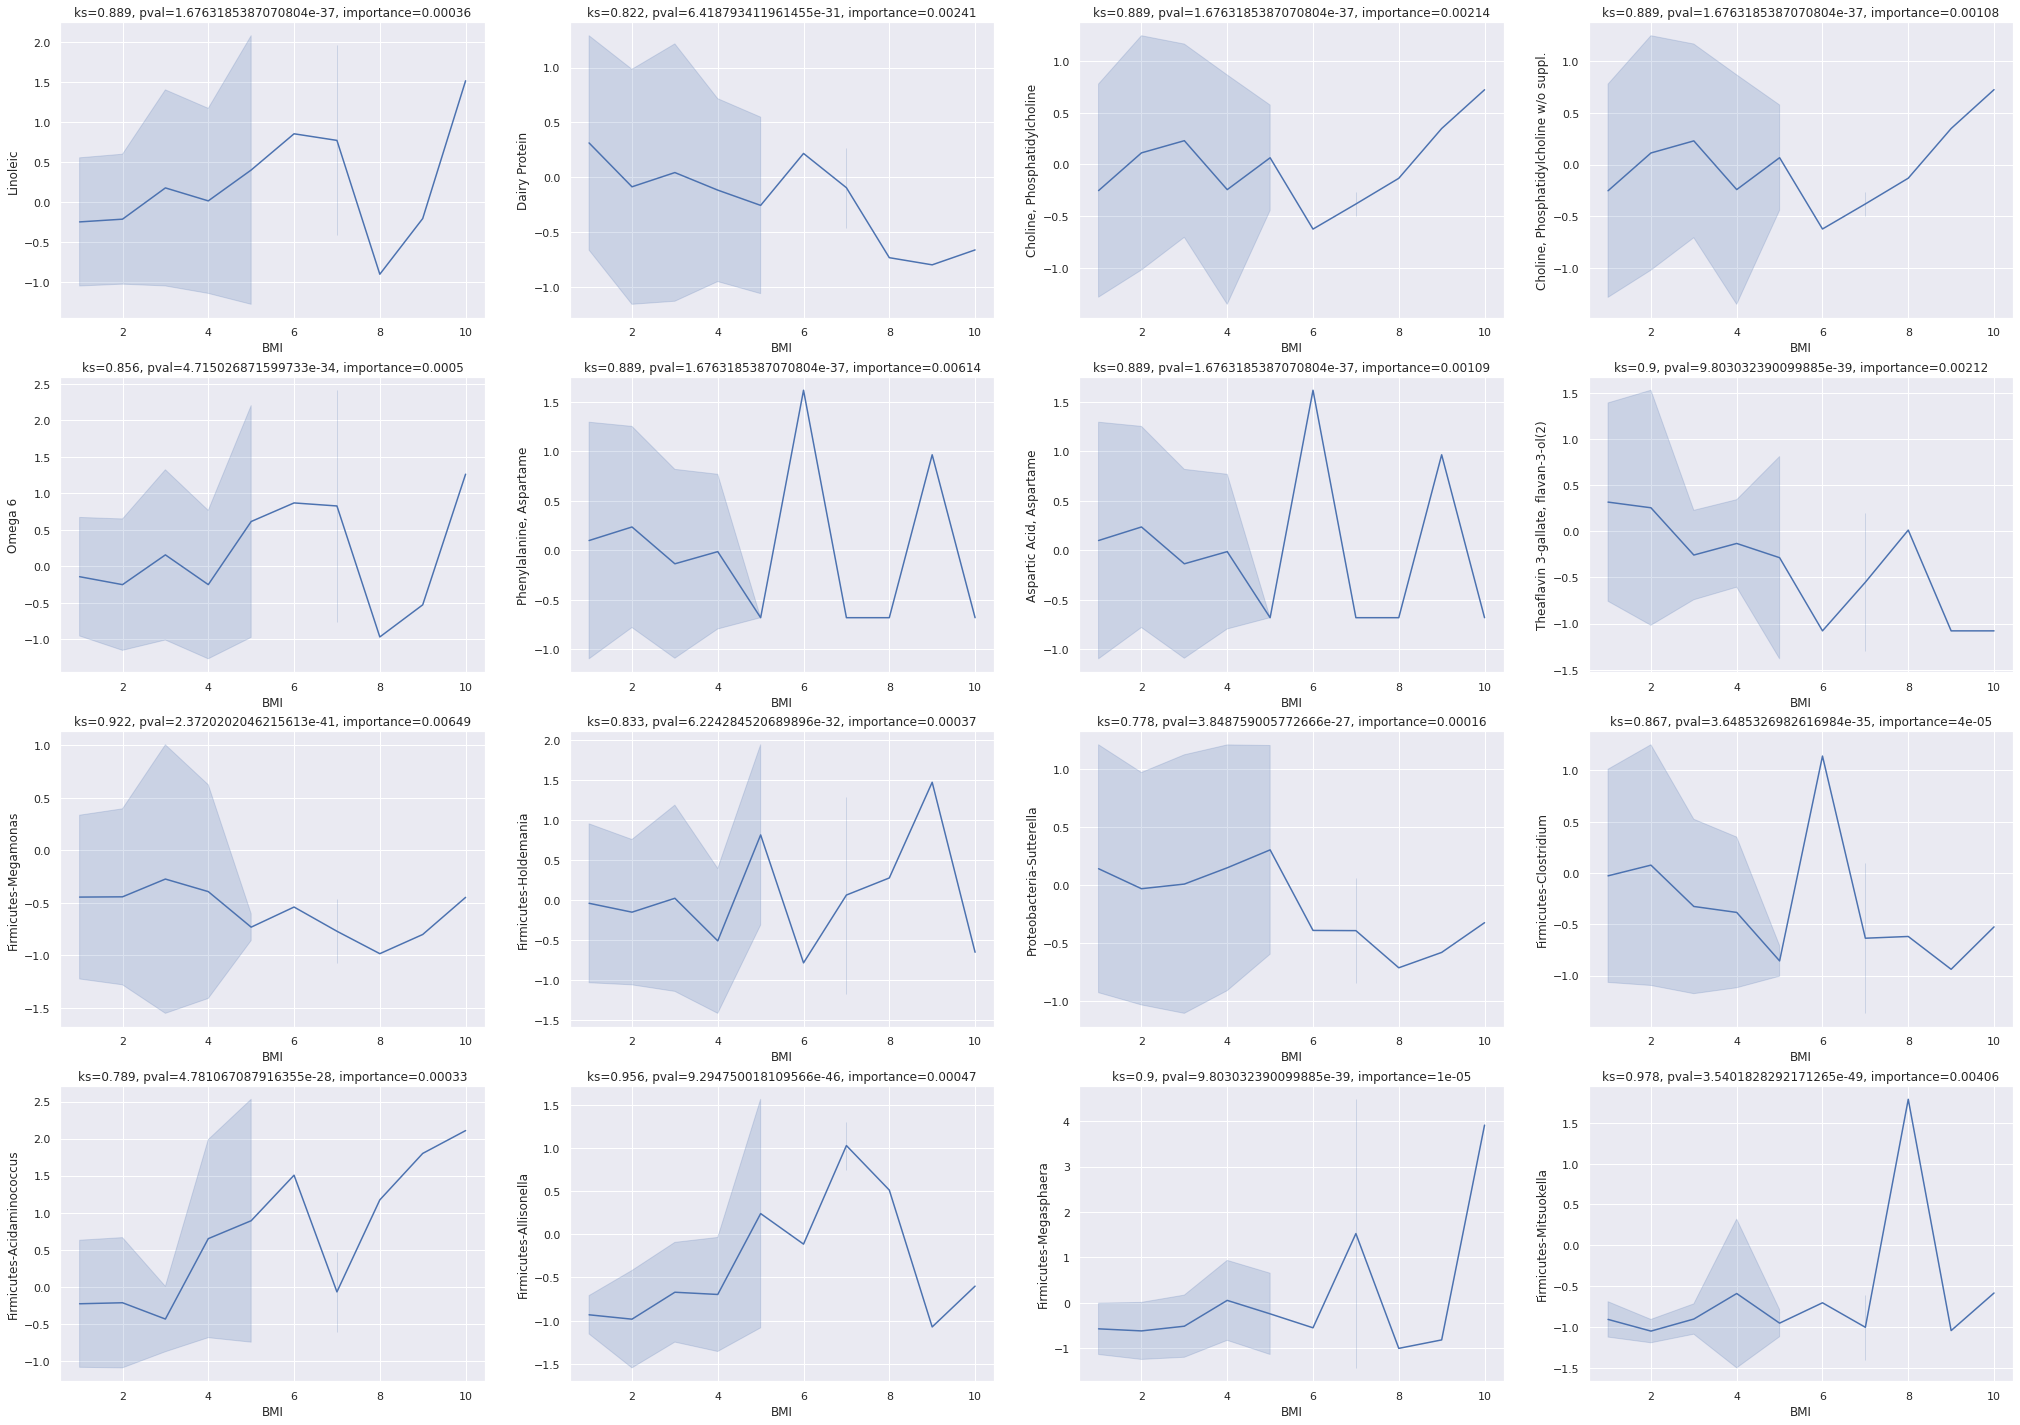

In [18]:
from scipy.stats import ks_2samp
association_list = [];
association_pvals = {};

fig, axs = plt.subplots(4,4,figsize=(35,25));
ax_idx = 0;
axs = axs.flatten();

for ele in prior_list:
    BMI = "BMI_disc";
    ax = sns.lineplot(x=BMI, y=ele, ci="sd", data=dataset,ax=axs[ax_idx]);#relplot , kind="line" lineplot 
    
    test_result = ks_2samp(dataset[BMI].values, dataset[ele].values);
    ks = round(test_result[0],3);
    pval = test_result[1];#round(,3);
    title_str = 'ks='+str(ks)+", pval="+str(pval)+", importance="+str(prior_dictionary[ele]);
    print(title_str);
    ax.set(title=title_str);
    ax.set_ylabel(prior_Short_names[ax_idx]);
    ax.set_xlabel("BMI");
    ax_idx = ax_idx+1;
plt.savefig("BMI_prior_nonlinear_associations_analysis.svg")    